# Assignment 10 #

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tiingo import TiingoClient
import numpy as np
from datetime import date
import warnings
warnings.filterwarnings('ignore')
from dateutil.relativedelta import relativedelta
config = {}

config['session'] = True

config['api_key'] = "110ee73e29ec4269f49eb85cfb4b976ab8e73361"

client = TiingoClient(config)

In [21]:
def download_financial_data(ticker):
    fin_data = client.get_ticker_price(ticker,
                                       fmt='csv',
                                       startDate = date.today() - relativedelta(years=2),
                                       endDate = date.today(),
                                       frequency = 'daily')
    file_name = f"{ticker}.csv"
    with open(file_name,'w') as outfile:
        outfile.write(fin_data)
    print(f'{ticker}.csv created')
    return pd.read_csv(f"{ticker}.csv")

In [22]:
cpi_df = download_financial_data('CPI')
cpi_df.head()

CPI.csv created


,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2020-06-11,27.07,27.09,27.07,27.09,1236,26.458009,26.477557,26.458009,26.477557,1236,0.0,1.0
1,2020-06-12,27.16,27.16,27.12,27.14,736,26.545974,26.545974,26.506879,26.526426,736,0.0,1.0
2,2020-06-15,27.17,27.19,27.17,27.19,313,26.555748,26.575296,26.555748,26.575296,313,0.0,1.0
3,2020-06-16,27.21,27.21,27.21,27.21,67,26.594844,26.594844,26.594844,26.594844,67,0.0,1.0
4,2020-06-17,27.19,27.20,27.18,27.20,2509,26.575296,26.585070,26.565522,26.585070,2509,0.0,1.0


### Using Numpy ###

In [23]:
close = cpi_df['adjClose'].to_numpy()
close

array([26.45800902, 26.54597433, 26.55574825, 26.59484394, 26.57529609,
       26.55574825, 26.54597433, 26.54597433, 26.52642648, 26.50687863,
       26.48733079, 26.46778294, 26.51303621, 26.5362004 , 26.62416571,
       26.57529609, 26.57558931, 26.5362004 , 26.56552217, 26.5362004 ,
       26.53131344, 26.51665256, 26.52642648, 26.54597433, 26.52642648,
       26.56552217, 26.5362004 , 26.54597433, 26.58536323, 26.57744636,
       26.56034199, 26.58634063, 26.62416571, 26.69610178, 26.68388438,
       26.67166697, 26.65368295, 26.69698143, 26.67753133, 26.68261377,
       26.71692024, 26.7218072 , 26.66834384, 26.69747013, 26.6627727 ,
       26.66296818, 26.68906456, 26.67577202, 26.59933994, 26.63872885,
       26.64361581, 26.66316366, 26.66648679, 26.64371355, 26.66814836,
       26.69737239, 26.68984647, 26.69747013, 26.72170946, 26.68632786,
       26.6632614 , 26.61839909, 26.67381724, 26.60764778, 26.60452012,
       26.68769621, 26.70890562, 26.73656582, 26.69072612, 26.61

In [24]:
cpi_df['adjClose'].dtype

dtype('float64')

In [25]:
year = list(range(len(close)))
A = np.vstack([year, np.ones(len(year))]).T
A

array([[  0.,   1.],
       [  1.,   1.],
       [  2.,   1.],
       ...,
       [502.,   1.],
       [503.,   1.],
       [504.,   1.]])

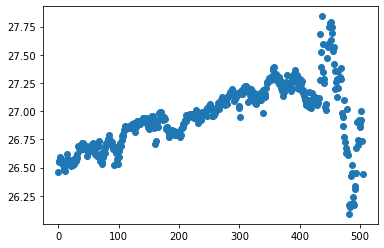

In [26]:
plt.scatter(x=year, y=close)

In [31]:
m, b = np.linalg.lstsq(A, close, rcond=None)[0]
print(f'OLS is y = {m:.10f} x + {b:.2f}')

OLS is y = 0.0011365998 x + 26.67


### Using Sklearn ###

In [35]:
from sklearn.linear_model import LinearRegression
yhat = close
year = np.array(year)
x_years = year.reshape((-1, 1))


In [36]:
model = LinearRegression()
model.fit(x_years, yhat)

LinearRegression()

In [37]:
mm = model.coef_
bb = model.intercept_
mm[0]
bb
print(f'OLS is y = {mm[0]:.10f} x + {bb:.2f}')

OLS is y = 0.0011365998 x + 26.67


### Other Stocks ###

In [42]:
import datetime as dt
import pandas_datareader as pdr
tickers = ['GE','IBM','WFC','^GSPC']
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2022, 1, 1)

df1 = pdr.get_data_yahoo(tickers, start, end, interval="d")
df1.head()

Attributes  Adj Close                                          Close  \
Symbols            GE         IBM        WFC        ^GSPC         GE   
Date                                                                   
2021-01-04  83.421616  110.134727  29.011139  3700.649902  83.760002   
2021-01-05  85.811913  112.089684  29.821888  3726.860107  86.160004   
2021-01-06  90.512833  114.888817  31.931789  3748.139893  90.879997   
2021-01-07  89.795746  114.622231  32.654629  3803.790039  90.160004   
2021-01-08  90.353493  114.213470  32.420189  3824.679932  90.720001   

Attributes                                           High              ...  \
Symbols            IBM        WFC        ^GSPC         GE         IBM  ...   
Date                                                                   ...   
2021-01-04  118.489487  29.700001  3700.649902  87.199997  120.382408  ...   
2021-01-05  120.592735  30.530001  3726.860107  87.040001  121.108986  ...   
2021-01-06  123.604210  32.689999  3748.139893  92.959999  126.080307  ...   
2021-01-07  123.317398  33.430000  3803.790039  92.559998  124.722755  ...   
2021-01-08  122.877632  33.189999  3824.679932  91.519997  123.632889  ...   

Attributes        Low                    Open                         \
Symbols           WFC        ^GSPC         GE         IBM        WFC   
Date                                                                   
2021-01-04  29.400000  3662.709961  87.120003  120.315491  30.320000   
2021-01-05  29.820000  3695.070068  83.440002  119.512428  30.090000   
2021-01-06  31.790001  3705.340088  86.639999  121.319313  31.900000   
2021-01-07  33.320000  3764.709961  92.480003  124.321220  33.580002   
2021-01-08  32.669998  3783.600098  90.320000  122.915871  33.610001   

Attributes                   Volume                                       
Symbols           ^GSPC          GE        IBM         WFC         ^GSPC  
Date                                                                      
2021-01-04  3764.610107   9993688.0  5417443.0  31421600.0  5.006680e+09  
2021-01-05  3698.020020  10462538.0  6395872.0  37360000.0  4.582620e+09  
2021-01-06  3712.199951  16448075.0  8322708.0  73507500.0  6.049970e+09  
2021-01-07  3764.709961   9411225.0  4714740.0  50634100.0  5.080870e+09  
2021-01-08  3815.050049   9089963.0  4891305.0  32324700.0  4.764180e+09  

[5 rows x 24 columns]

In [44]:
price_df = df1['Adj Close']
ret_df = price_df.pct_change()
ret_df.dropna(inplace=True)

In [45]:
ret_df = ret_df[ret_df['^GSPC'] != 0.0]

In [58]:
ret_df.head()
ret_df.shape

(251, 4)

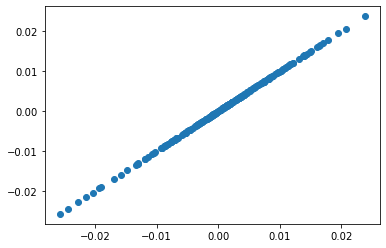

In [47]:
plt.scatter(x=ret_df['^GSPC'], y=ret_df['^GSPC'])

<AxesSubplot:xlabel='^GSPC', ylabel='Count'>

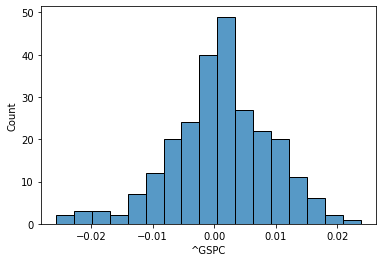

In [49]:
sns.histplot(ret_df['^GSPC'])

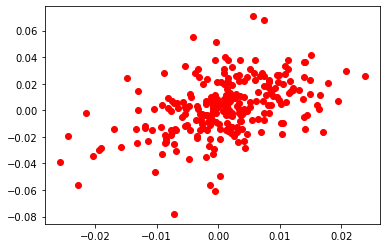

In [50]:
plt.scatter(x=ret_df['^GSPC'], y=ret_df['WFC'], c='r')

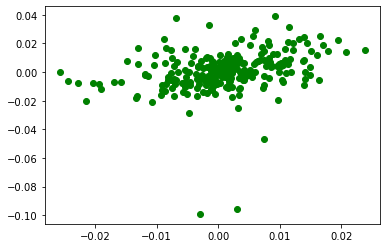

In [51]:
plt.scatter(x=ret_df['^GSPC'], y=ret_df['IBM'], c='g')

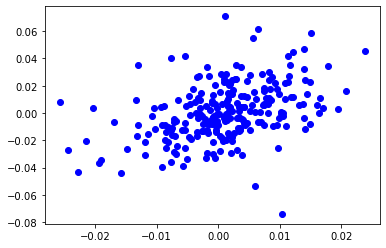

In [52]:
plt.scatter(x=ret_df['^GSPC'], y=ret_df['GE'], c='b')

<AxesSubplot:xlabel='^GSPC', ylabel='WFC'>

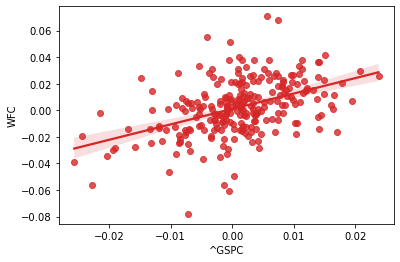

In [53]:
sns.regplot(data=ret_df, x='^GSPC', y='WFC', color='tab:red', fit_reg=True)

<AxesSubplot:xlabel='^GSPC', ylabel='IBM'>

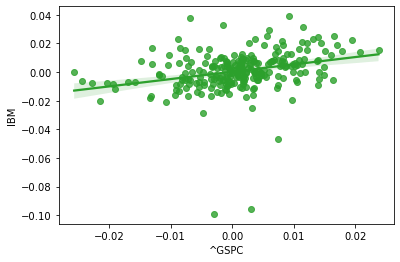

In [54]:
sns.regplot(data=ret_df, x='^GSPC', y='IBM', color='tab:green', fit_reg=True)

<AxesSubplot:xlabel='^GSPC', ylabel='GE'>

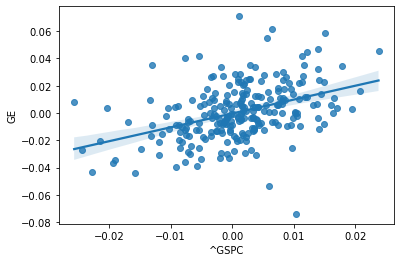

In [55]:
sns.regplot(data=ret_df, x='^GSPC', y='GE', color='tab:blue', fit_reg=True)

In [62]:
ticker = ['WFC','IBM','GE']

for i in ticker:
    regr = LinearRegression()
    X = ret_df['^GSPC'].values.reshape(-1,1)
    y = ret_df[i].values.reshape(-1,1)
    regr.fit(X, y)
    bbb = regr.intercept_[0]
    mmm = regr.coef_[0][0]
    print(f'OLS alpha and beta for {i} is y = {mmm:.2f} x + {bbb:.10f}')

OLS alpha and beta for WFC is y = 1.16 x + 0.0009818659
OLS alpha and beta for IBM is y = 0.51 x + 0.0002477049
OLS alpha and beta for GE is y = 1.02 x + -0.0003595743
